In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# --- Loading Data ---
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
# --- Exploratory Data Analysis ---

# Checking the structure of the dataset
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB
None


In [6]:
# Checking for missing values
print(train_data.isna().sum())

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


In [7]:

# Displaying the first few rows of the training dataset
print(train_data.head())

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


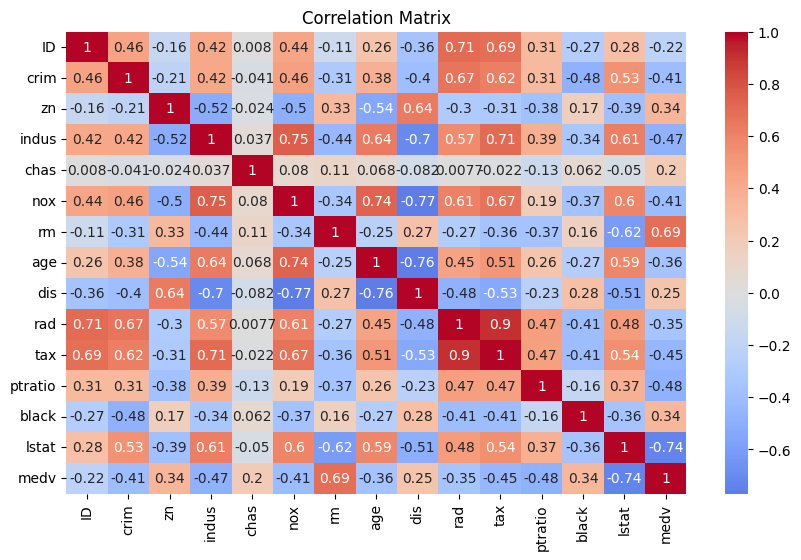

In [8]:
# --- Visualizations ---

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

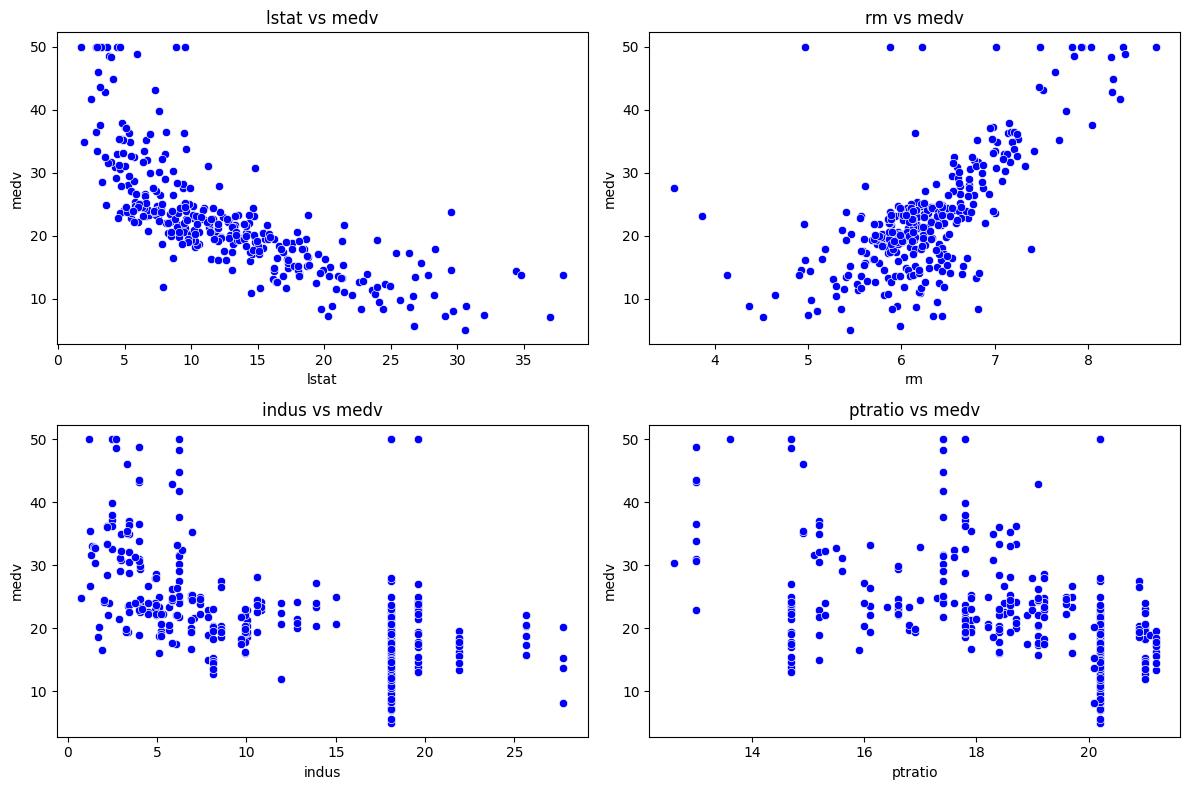

In [21]:
# Scatter plots for important features
important_features = ['lstat', 'rm', 'indus', 'ptratio']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=train_data[feature], y=train_data['medv'], color='blue')
    plt.title(f'{feature} vs medv')

plt.tight_layout()
plt.show()

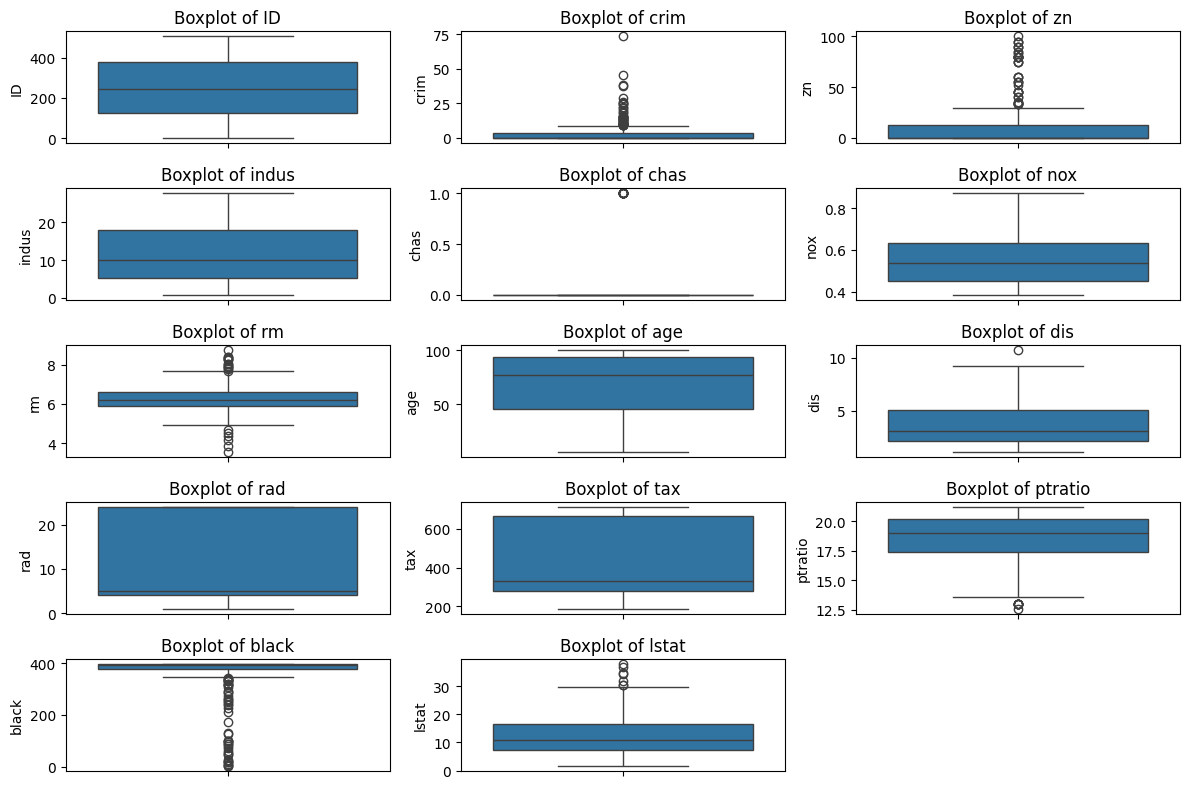

In [10]:

# Boxplots for identifying outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(train_data.columns[:-1], 1):  # Exclude target column 'medv'
    plt.subplot(5, 3, i)
    sns.boxplot(y=col, data=train_data)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [11]:

# --- Data Cleaning: Removing Outliers ---
train_data_cleaned = train_data[~((train_data['crim'] >= 25))]
train_data_cleaned = train_data_cleaned[~((train_data_cleaned['rm'] >= 8.5) | (train_data_cleaned['rm'] < 4))]
train_data_cleaned = train_data_cleaned[~(train_data_cleaned['lstat'] >= 30)]

In [12]:

# --- Feature Selection and Model Training ---

# Selecting relevant features and target
X = train_data_cleaned[['lstat', 'rm', 'indus', 'ptratio', 'tax', 'nox', 'crim', 'age']]
Y = train_data_cleaned['medv']

In [13]:

# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [14]:
# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 12.168729681043796
Coefficients: [-7.19484858e-01  5.34359785e+00  1.26504710e-01 -7.81817665e-01
 -2.89044912e-03 -2.60911011e+00  5.63687328e-02  1.86447916e-02]


In [15]:

# --- Model Evaluation ---
# Predicting the target variable using the training data
Y_pred = model.predict(X)


In [16]:


# Calculating the Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 4.916284302163122


In [17]:

# --- Making Predictions for the Test Dataset ---

# Selecting the same features from the test dataset
X_test = test_data[['lstat', 'rm', 'indus', 'ptratio', 'tax', 'nox', 'crim', 'age']]


In [18]:
# Predicting the target variable for the test data
Y_test_pred = model.predict(X_test)

In [19]:
# Displaying the test predictions
print("ID\tPrediction")
for test_id, prediction in zip(test_data['ID'], Y_test_pred):
    print(f"{test_id}\t{prediction}")

ID	Prediction
3	33.858563884168944
6	27.694817440260845
8	20.017053362754712
9	9.446594073906887
10	20.405532846781256
18	17.510030047309463
20	18.31295908866706
25	16.213874531643153
26	14.174586128904608
27	16.617500909907204
29	21.790140607351113
30	23.21717855565403
33	7.953831900751568
34	13.58671835554346
36	21.81756194427761
37	19.95633294245968
38	21.53185881610614
42	29.961089331887795
49	5.679900357812152
53	29.28961304003188
60	21.33678642708048
63	26.339543712073553
70	21.84123222759076
72	21.646106332369953
79	22.30848147086744
80	22.409323509594618
83	25.44815007620319
92	26.33351513376114
93	27.405421601332407
96	28.204102036048877
98	38.01506739052219
99	36.41377435673751
100	32.84646914812697
105	20.21357106471777
106	15.670853481292962
111	19.215597171117803
113	18.515725543296274
114	18.891265784950598
116	18.834725694247652
126	21.41049370637304
130	14.214017826614782
131	22.778756678812876
133	23.379491681031848
136	18.983761408769798
141	12.842341448707197
144	12.